In [2]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

## A/B Testing
an experiment with two groups to establish which of two is superior

## Hypothesis Tests


*   **Null Hypothesis**: hypothesis that chance is to blame(chance)
*   **Alternative hypothesis**: Coutnerpoint to the null
*   **One-way test**: hypothesis test that coutns chance results only in one direction (A > B or B>A)
*  **Two-way test**: Hypothesis test that counts chance results in two direction (A is different from B)



## Resampling
 repeatedly sampling values from observed data to assess the random variability of a statistic.
Two types of resampling procedures: \
*   Bootstrap: used to assess the reliability of an estimate
*   Permutation: used to test hypotheses; combine two of more samples together, and randomly reallocating the observations to resamples. Permuation invovles combining data from different groups, shuffling, and reallocating to create resampled groups, and then comparing the observed results to the distribution of results from this resampled data.

**proxy variable**:  used in replace of true variable of interest because variable of interest is unavailable/too costly/too time-consuming to measure


In [ ]:
session_df = pd.read_csv("./data/web_page_data.csv")
session_df.Time = session_df.Time*100
session_df.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


In [ ]:
session_df.groupby('Page').count()

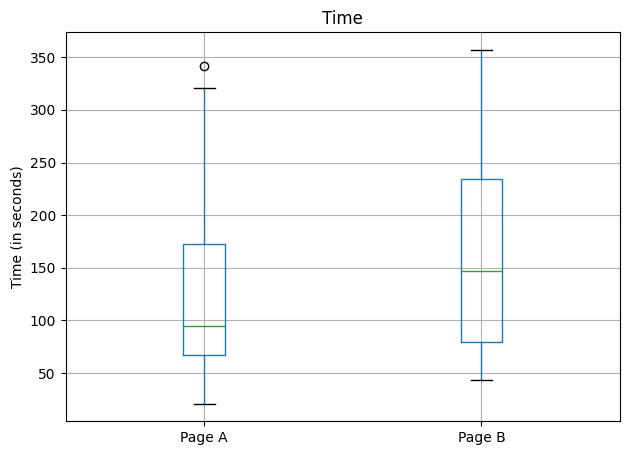

In [ ]:
ax = session_df.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [ ]:
mean_a = session_df[session_df.Page == 'Page A'].Time.mean()
mean_b = session_df[session_df.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

35.66666666666667


Boxplot showing that Page B has session time greater. The question is whether this difference is within the range of random chance or statistically significant. => do permutation test: combine all session times together, the nrepeated shuffle and divide them into groups of 21(for page A) and 15(for page B)

In [ ]:

session_df.groupby('Page').size().reset_index()

In [ ]:
nA = session_df[session_df.Page == 'Page A'].shape[0]
nB = session_df[session_df.Page == 'Page B'].shape[0]
def permutation_test(nA, nB, serieX):
  n=nA+nB
  idx_b = np.random.choice(n, nB, replace=False) # or use random.sample(range(n), nB)
  idx_a = [i for i in range(n) if i not in idx_b]
  return serieX[idx_b].mean() - serieX[idx_a].mean()

permutation_test(nA, nB, session_df.Time)

np.float64(-10.50476190476192)

NameError: name 'mean_b' is not defined

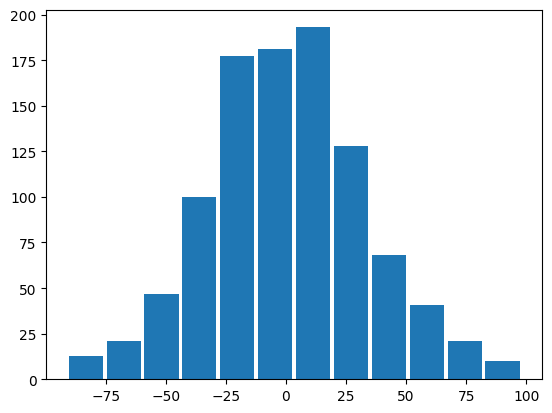

In [ ]:
from math import perm
perm_diffs = [permutation_test(nA, nB, session_df.Time) for i in range(1000)]
fig, ax = plt.subplots()
ax.hist(perm_diffs, bins =12, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)

ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The observed difference in session between page A nad B is within range of chance variation, thus not statistically significant

## **Exhaustive and Boostrap Permutation Test**

There are two varaints of permutation test (random permuatation test or randomization test):


*   Exhaustive permutation test (exact test): instead randomly shuffling and divign => figure out all possible ways it could be divided
*   Boostrap Permutation test: do with replacment intead of wihtout replacement



## **Statistical Significance and P-values**


*   **P-value**: the chance model produces result more extreme than observed result. Given a chance model that embodies the null hypothesis, p-value is probability of obtaining results as unusal or extrame as the observed results
*   **Alpha** : probability threshold of "unusualness" that chance resutls must surpass, for actual outcomes to be deemed statistically significant
* **Type1 error**: mistakenly concluding an effect is real when it's due to chance
* **Type 2 error**: mistabken concluding an effect is due to chance when it's real



In [ ]:
obs_pct_diff= 100 * (200 / 23739 - 182 / 22588)
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [permutation_test(23739, 22588, conversion) for i in range(1000)]

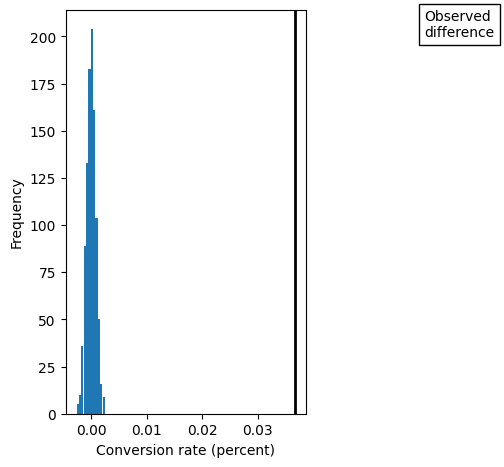

In [ ]:
fig, ax = plt.subplots()
ax.hist(perm_diffs, bins=12, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## t-Tests

In [ ]:
#T-test for the means of two independent samples of scores.
res = stats.ttest_ind(session_df[session_df.Page == 'Page A'].Time,
                      session_df[session_df.Page == 'Page B'].Time,
                      equal_var=False)

print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

TtestResult(statistic=np.float64(-1.098315562363811), pvalue=np.float64(0.2815243724570064), df=np.float64(27.693370059531322))
p-value for single sided test: 0.1408


## Multiple Testing

*   **Type 1 error**: mistakenly concluding that an effect is statistically significant
*   **False discovery rate***: across multiple tests, rate of making Type 1 error
* **Adjustment of p-valeus**: accounting for doing multiple tests on the same data
* **Overfitting**: fitting the noise



## **ANOVA** (Analysis of variance)
compare the means of more than two groups, checking for significant differences among group means relative to the variability within each group.


*   **Omnibus test**: single hypothesis test of overall variance among multiple group means
*   **Decomposition of variance**: seperation of components conttributing to an individual value
* **F-statistic**: standardized statistic that measures the extent to which differences among group means exceeds what might be expected in a chance model. Like t test used instead of a permutation test for comparing mean of two groups
* **SS**: Sum of squares, deviations from some average value





In [ ]:
four_session_df = pd.read_csv("./data/four_sessions.csv")
four_session_df.head()

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


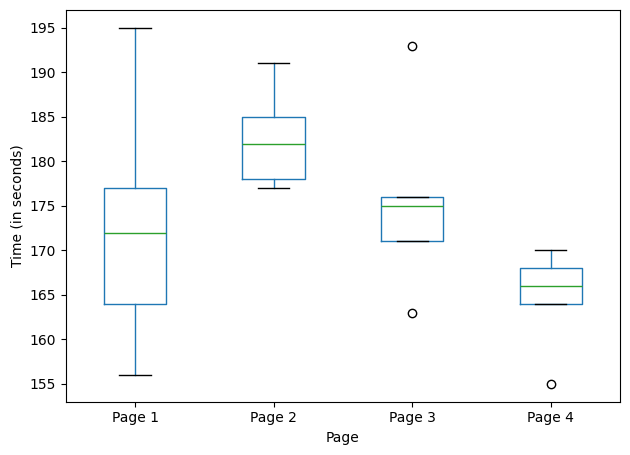

In [ ]:
ax=four_session_df.boxplot(by="Page", column="Time")

ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')
plt.grid(False)
plt.tight_layout()
plt.show()

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
3.7733333333333356
Pr(Prob) 0.07433333333333333


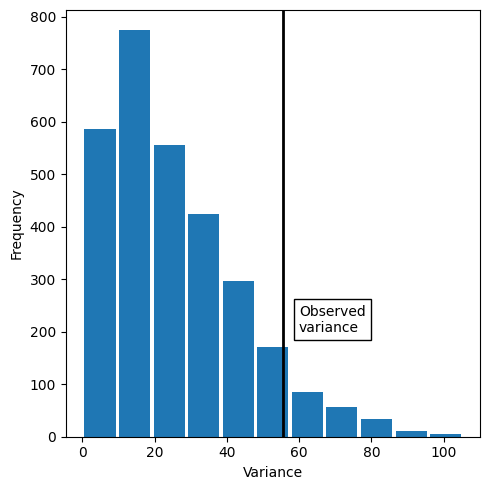

In [ ]:
observed_variance = four_session_df.groupby('Page').mean().var().iloc[0]
print('Observed means:', four_session_df.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)
# Permutation test example with stickiness
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var().iloc[0]

print(perm_test(four_session_df))
random.seed(1)
perm_variance = [perm_test(four_session_df) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_variance, color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### **F-statistic**

In **One-Way ANOVA**
one-way ANOVA, the F-statistic is used to determine if there's a significant difference between the means of two or more groups

In [ ]:
model = smf.ols('Time ~ Page', data=four_session_df).fit()

aov_table = sm.stats.anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN


OTher method

In [ ]:
res = stats.f_oneway(four_session_df[four_session_df.Page == 'Page 1'].Time,
                     four_session_df[four_session_df.Page == 'Page 2'].Time,
                     four_session_df[four_session_df.Page == 'Page 3'].Time,
                     four_session_df[four_session_df.Page == 'Page 4'].Time)
print(f'F-Statistic: {res.statistic / 2:.4f}')
print(f'p-value: {res.pvalue / 2:.4f}')


F-Statistic: 1.3699
p-value: 0.0388


Two-way anova only available with statsmodels \
If using two-way

`formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)' \
model = ols(formula, data).fit() \
aov_table = anova_lm(model, typ=2)`

## **Chi-Square Test**



In [4]:
click_rate_df = pd.read_csv("data/click_rates.csv")
click_rate_df.head()


,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12


In [6]:
clicks=click_rate_df.pivot(index='Click', columns='Headline', values='Rate')
clicks

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [8]:
row_average = clicks.mean(axis=1)
pd.DataFrame({
    'Headline A': row_average,
    'Headline B': row_average,
    'Headline C': row_average,
})

,Headline A,Headline B,Headline C
Click,,,
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


In [9]:
# Resampling approach
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect
                                  for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [expected_clicks, expected_noclicks]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    random.shuffle(box)
    sample_clicks = [sum(box[0:1000]),
                     sum(box[1000:2000]),
                     sum(box[2000:3000])]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4480


the test shows that this result could easily been obtained by randomness

In [10]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348


In [11]:
expected = [expected_clicks, expected_noclicks]
def sample_with_replacement(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [sample_with_replacement(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4970


### Chi-Square Distribution

df=(number of rows−1)×(number of columns−1)

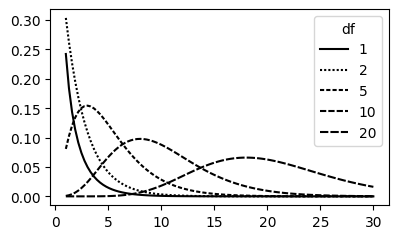

In [12]:
x = [1 + i * (30 - 1) / 99 for i in range(100)]

chi = pd.DataFrame({
    'x': x,
    'chi_1': stats.chi2.pdf(x, df=1),
    'chi_2': stats.chi2.pdf(x, df=2),
    'chi_5': stats.chi2.pdf(x, df=5),
    'chi_10': stats.chi2.pdf(x, df=10),
    'chi_20': stats.chi2.pdf(x, df=20),
})
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(chi.x, chi.chi_1, color='black', linestyle='-', label='1')
ax.plot(chi.x, chi.chi_2, color='black', linestyle=(0, (1, 1)), label='2')
ax.plot(chi.x, chi.chi_5, color='black', linestyle=(0, (2, 1)), label='5')
ax.plot(chi.x, chi.chi_10, color='black', linestyle=(0, (3, 1)), label='10')
ax.plot(chi.x, chi.chi_20, color='black', linestyle=(0, (4, 1)), label='20')
ax.legend(title='df')

plt.tight_layout()
plt.show()

The plot has probability on y-axis, value of chi square statistic on x-axis

## **Fisher's Exact Test**

The Chi-squared test and Fisher's exact test are both used to analyze categorical data in contingency tables to determine if there's an association between two variables. However, they differ in how they calculate the p-value, with Fisher's exact test providing an exact p-value, while the Chi-squared test provides an approximate p-value, especially for smaller sample sizes.

In [18]:
from scipy.stats import fisher_exact
fisher_exact(clicks.values)

SignificanceResult(statistic=np.float64(0.010534856070261427), pvalue=np.float64(0.4623))

## **Power and Sample Size**

https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/

In [20]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size,
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 116602.391


In [21]:
effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size,
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 5488.408
